In [1]:
%load_ext watermark
%watermark

2018-12-28T13:54:57-06:00

CPython 3.6.7
IPython 7.2.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La magia de %matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere cerrar cada plot para poder continuar.

Alternativamente, se puede usar la magia de %matplotlib inline, que es mas sencilla ya que simplemente muestra el grafico original en jupyter notebook. Para poder modificar el tamaño de los plots esn este caso solo basta con cambiar el parametro general de matplotlib figure.figsize al tamaño de grafico deseado(en pulgadas)

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"]=(20,20)#20 pulgadas de alto por 20 pulgadas de ancho para cada plot

# Lectura de datos

In [4]:
vehiculos=pd.read_pickle("/home/jose/data/vehiculos_3_variables_agrupadas.pkl")

In [5]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
trasmicion_tipo           object
combustible_tipo        category
tamaño_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

In [5]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,trasmicion_tipo,combustible_tipo,tamaño_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Automatica,Premium,grande,alto,alto,0.236588


In [6]:
#Cargamos los pywidgets
from ipywidgets import interact,fixed

## Recuento de multiples grupos 

In [7]:
def pivot_recuento(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [8]:
consumo_combustible = pivot_recuento(vehiculos,"combustible_tipo","consumo_tipo", "year")
consumo_combustible

consumo_tipo,muy bajo,bajo,modera,alto,muy alto
combustible_tipo,,,,,
Hibrido,61.0,6.0,1.0,2.0,NaN
Normal,5686.0,4931.0,5736.0,3158.0,4567.0
Otros tipos de combustible,521.0,340.0,508.0,482.0,586.0
Premium,1386.0,2211.0,3836.0,1146.0,1627.0


In [9]:
def heatmap_recuento_tipos(df, col1, col2):
    pivot_table = pivot_recuento(df,col1, col2, "year")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

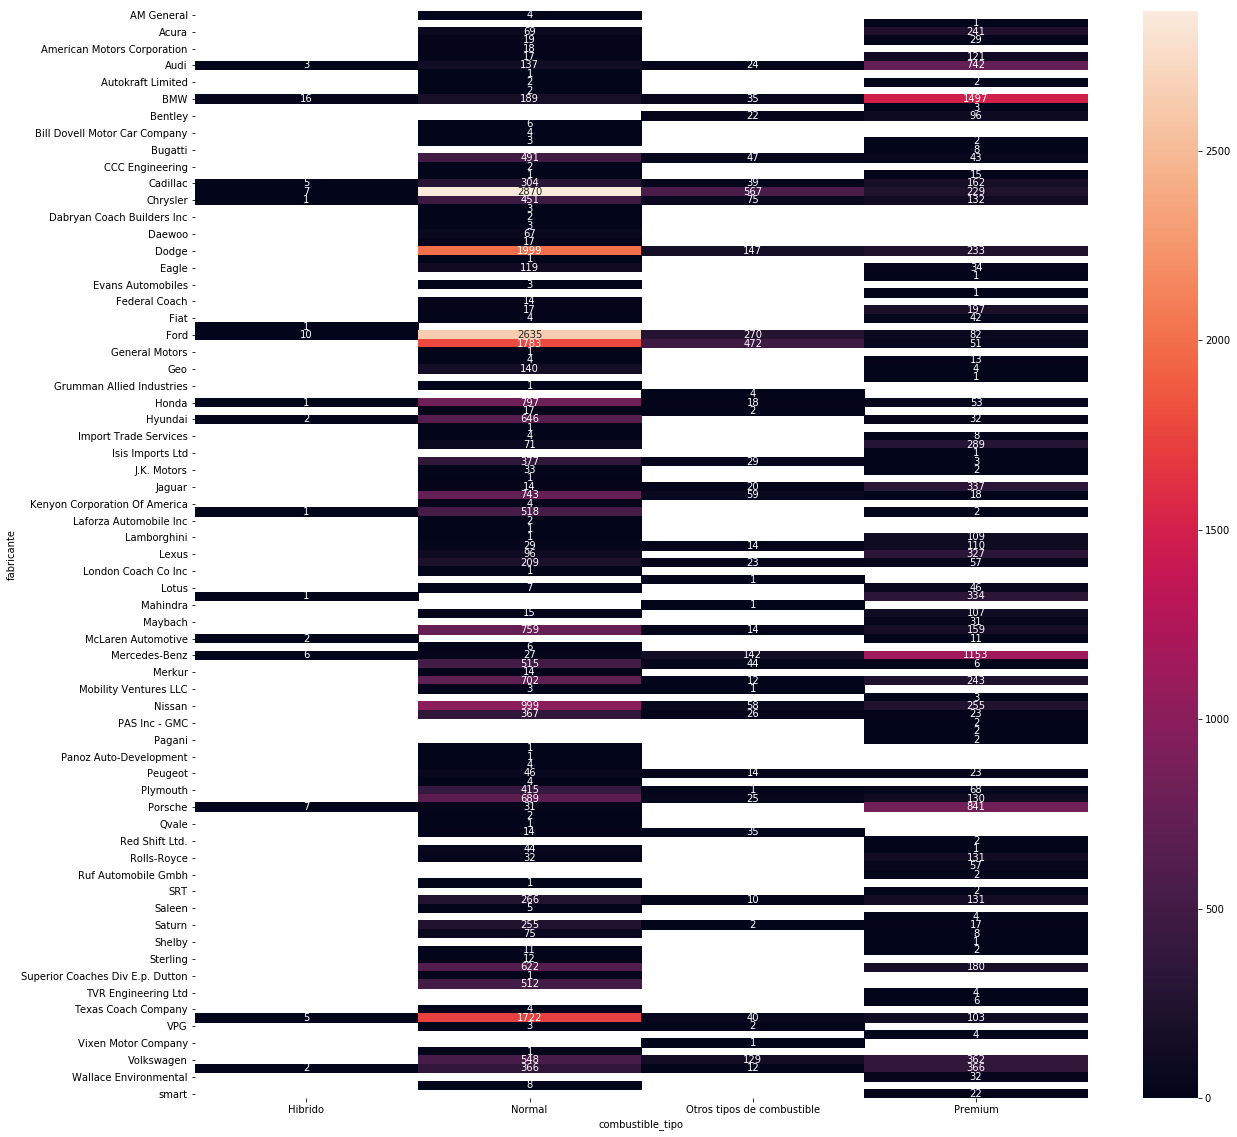

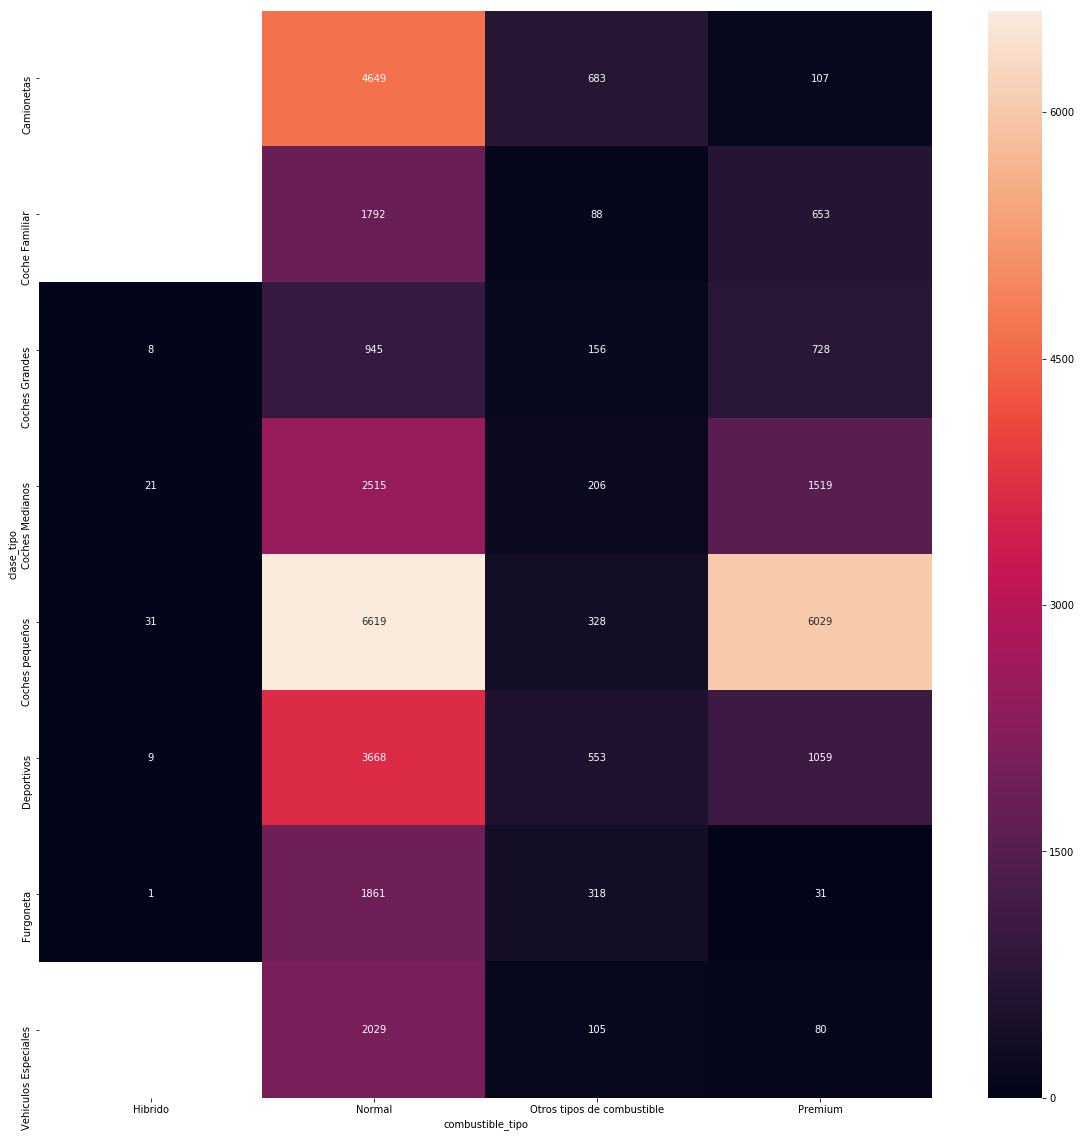

In [10]:
interact(heatmap_recuento_tipos, col1=vehiculos.columns, col2=vehiculos.columns, df=fixed(vehiculos));


## Conclusiones 
    Hay mas vehiculos de dos ruedas de bajo consumo que de traccion a las 4 ruedas.
    Los fabricante se centran mas en los vehiculos de motor pequeño/bajo consumo y motor muy grande/alto consumo.
    La moyor parte de los coches tienen transmision automatica, con los coches pequeños teniendo valores similares automaticos y manueales.
    Hay una cantidad de camionetas que son mas contaminantes que cualquier otro tipo de coche.

# Medidas por variables categóricas.

In [12]:
def medias_por_categoria(col_grupo,col_calculo):
    vehiculos.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel("Valores medios de {}".format(col_calculo))
    plt.show()
columnas_numericas=vehiculos.select_dtypes(["int","float"]).columns
columnas_categoricas=vehiculos.select_dtypes(["object","category"]).columns
columnas_tipo=[col for col in vehiculos.columns if col.endswith("_tipo")]

In [13]:
interact(medias_por_categoria,col_grupo=columnas_categoricas,col_calculo=columnas_numericas);

interactive(children=(Dropdown(description='col_grupo', options=('fabricante', 'modelo', 'transmision', 'tracc…

# Conclusiones 
    Vehiculo con transmision automatica tienen valores de co2 y consumo ligeramente mas altos
    Furgonetas y camionetas tienen el cosumo mas alto(alrededor de 0.25 litros/milla), Por otra parte los coches familiares y pequeños tienen el menor consumo de gasolina(0.15 litros/milla)
    Los vehiculos hibridos emiten menos de la mitad de co2 que ql resto de vehiculos(con emisiones similares)
    


## Medidas por multiples tipos

In [17]:
def pivot_media(rows,columns,calc_field):
    df_pivot=vehiculos.pivot_table(values=calc_field,
                                  index=rows,
                                  columns=columns,
                                  aggfunc=np.mean                         
                                  ).dropna(axis=0,how="all")
    return df_pivot

In [21]:
pivot_media("clase_tipo","consumo_tipo","co2")

consumo_tipo,muy bajo,bajo,modera,alto,muy alto
clase_tipo,,,,,
Camionetas,374.070980,412.811327,479.077641,545.929205,654.119397
Coche Familiar,341.469338,409.359695,464.994994,537.080519,602.133700
Coches Grandes,330.570765,415.923785,473.674276,537.538161,660.891596
Coches Medianos,320.411258,412.004204,467.041724,536.571835,695.796955
Coches pequeños,326.172982,405.748144,467.750359,538.731470,695.504850
Deportivos,346.053158,408.154744,470.559304,540.361507,627.221594
Furgoneta,362.788690,415.484764,479.514860,543.299017,658.984636
Vehiculos Especiales,363.338473,408.419136,478.301552,545.272667,680.334109


Podemos crear un mapa de calor para mayor intractividad

In [26]:
def heatmap_medias_tipos(col1,col2,col3):
    pivol_table=pivot_media(col1,col2,col3)
    sns.heatmap(pivol_table,annot=True,fmt="g")
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

<function __main__.heatmap_medias_tipos(col1, col2, col3)>

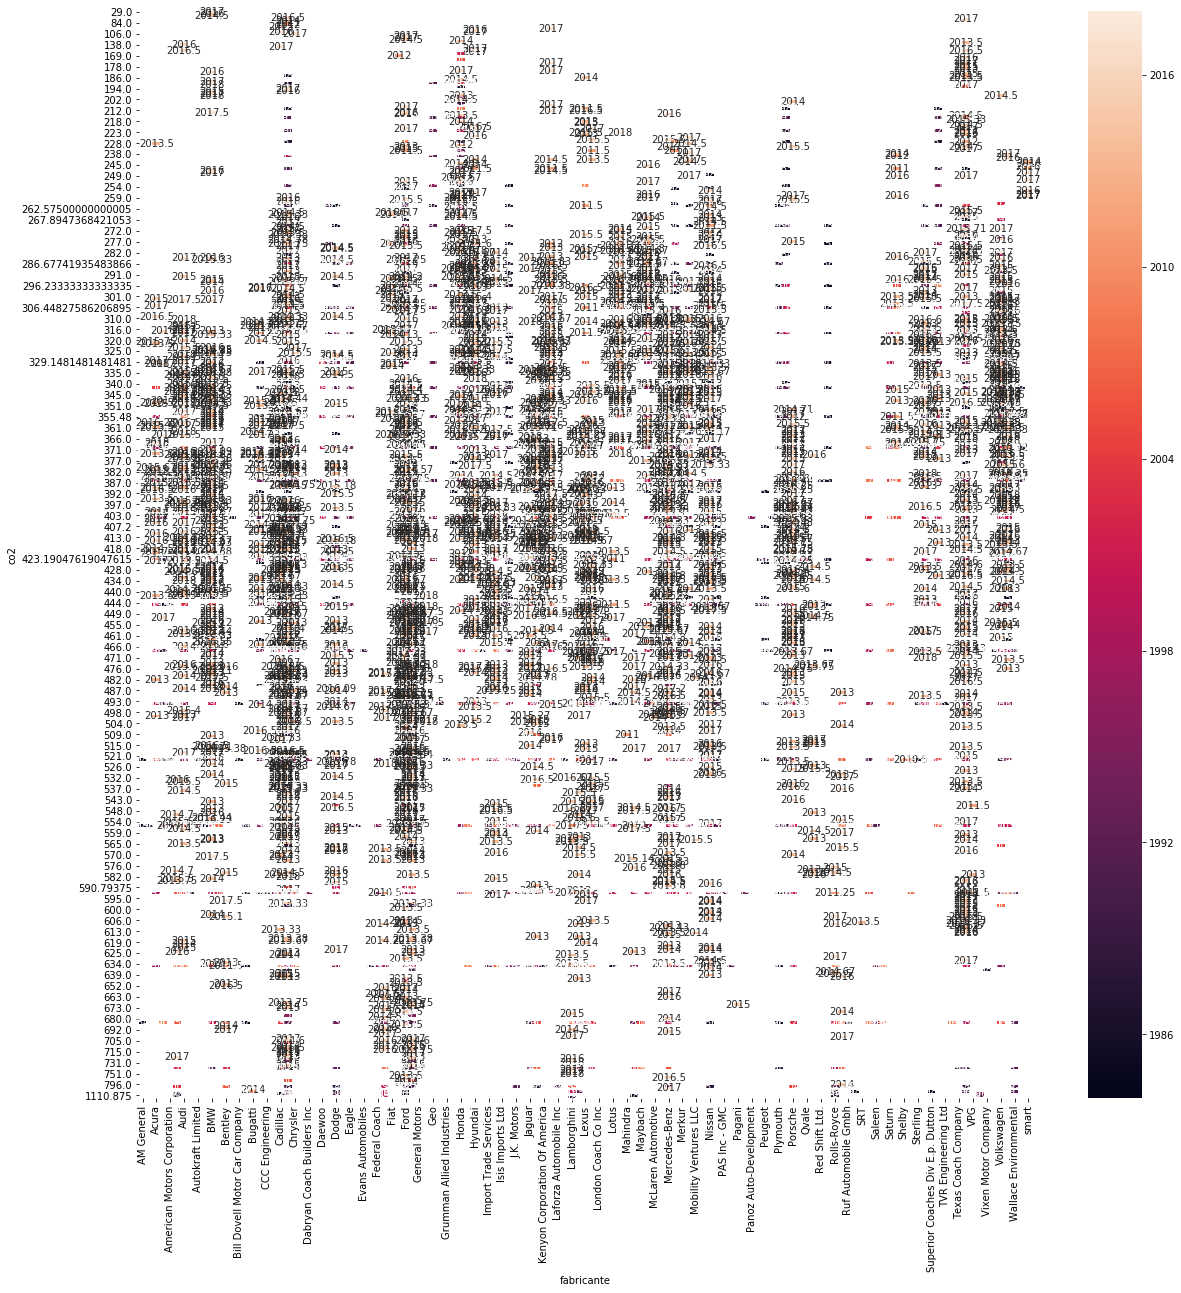

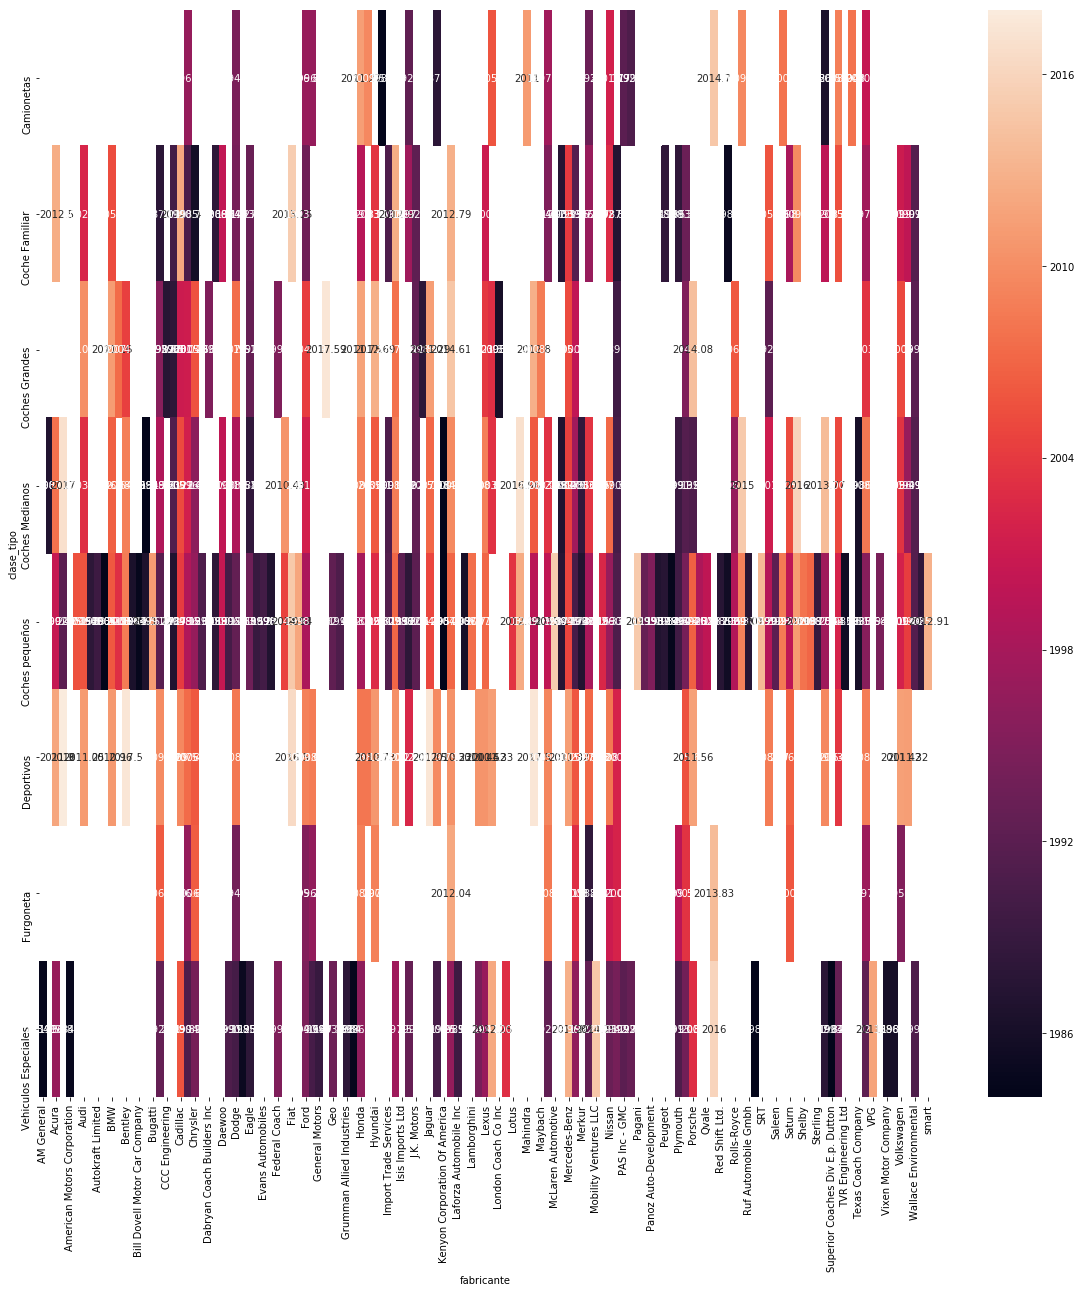

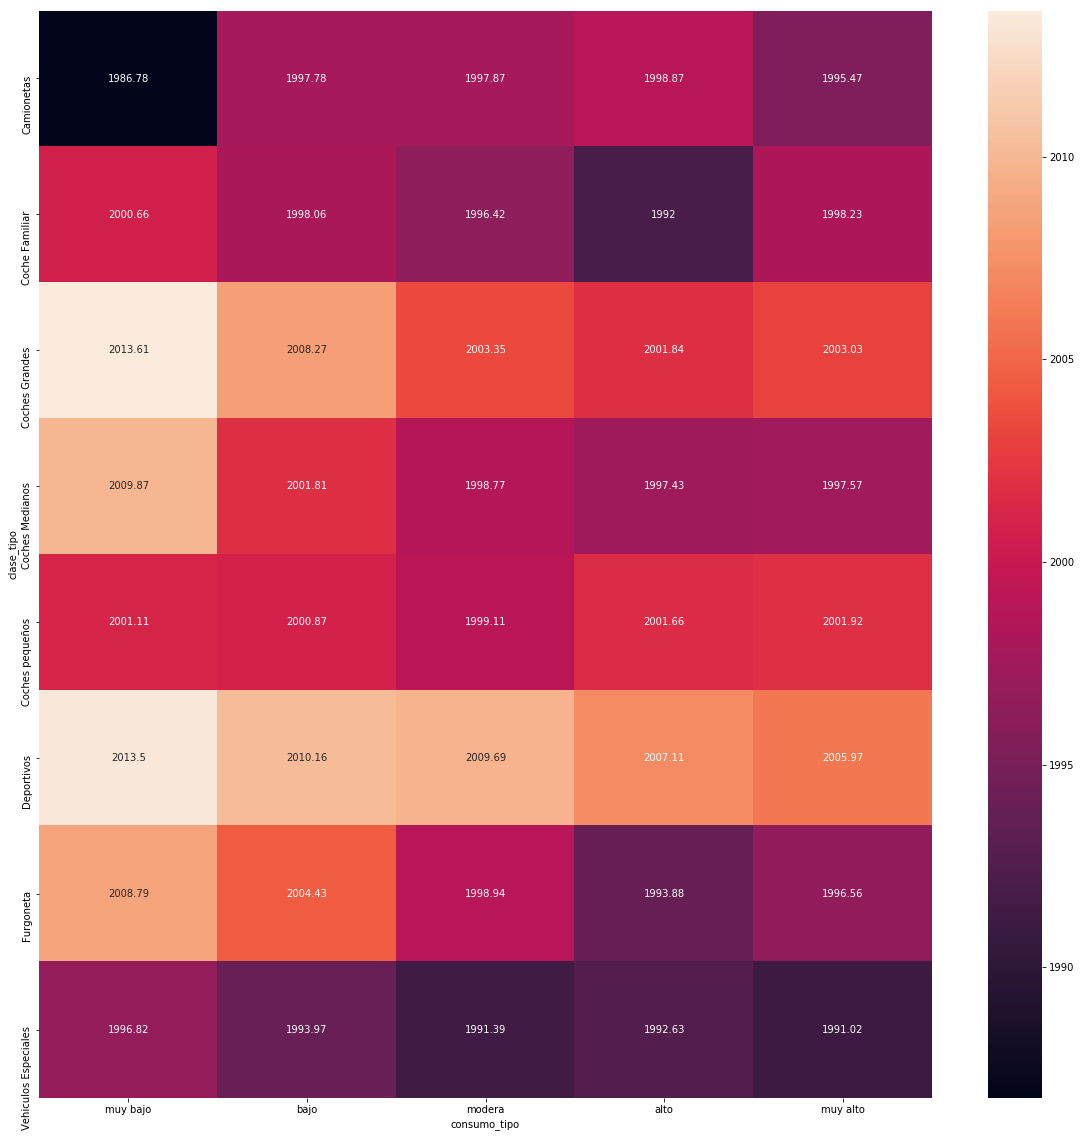

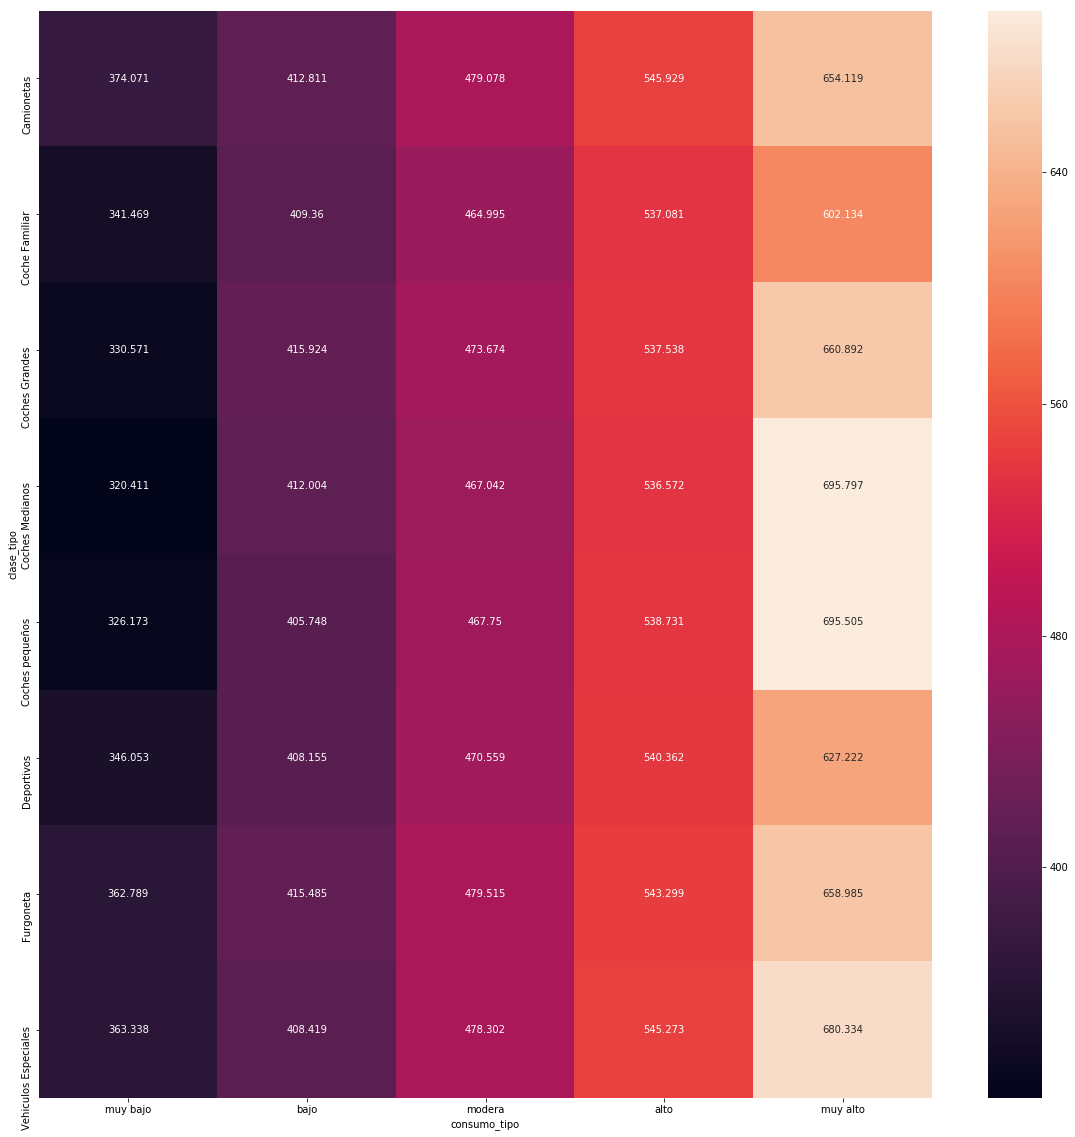

In [27]:
interact(heatmap_medias_tipos,col1=vehiculos.columns,col2=vehiculos.columns,col3=columnas_numericas)

# Conclusiones 
    Camionetas de gasolina premium consumen bun 38% mas que los vehiculos pequeños que usan el mismo tipo de gasolina
   

# Comparacion de tendencias(temporales)
En este dataset en particular, tenemos una variable temporal year. A la cual echamos un vistazo en un apartado
anterior pero que conviene observar de nuevo. Podemos considerarla uan varable(ordinal) ya que nos es una variable continua.


Para la cual tiene sentido ver su evolucion.

In [29]:
vehiculos_pre_2017=vehiculos.query("year<2017")

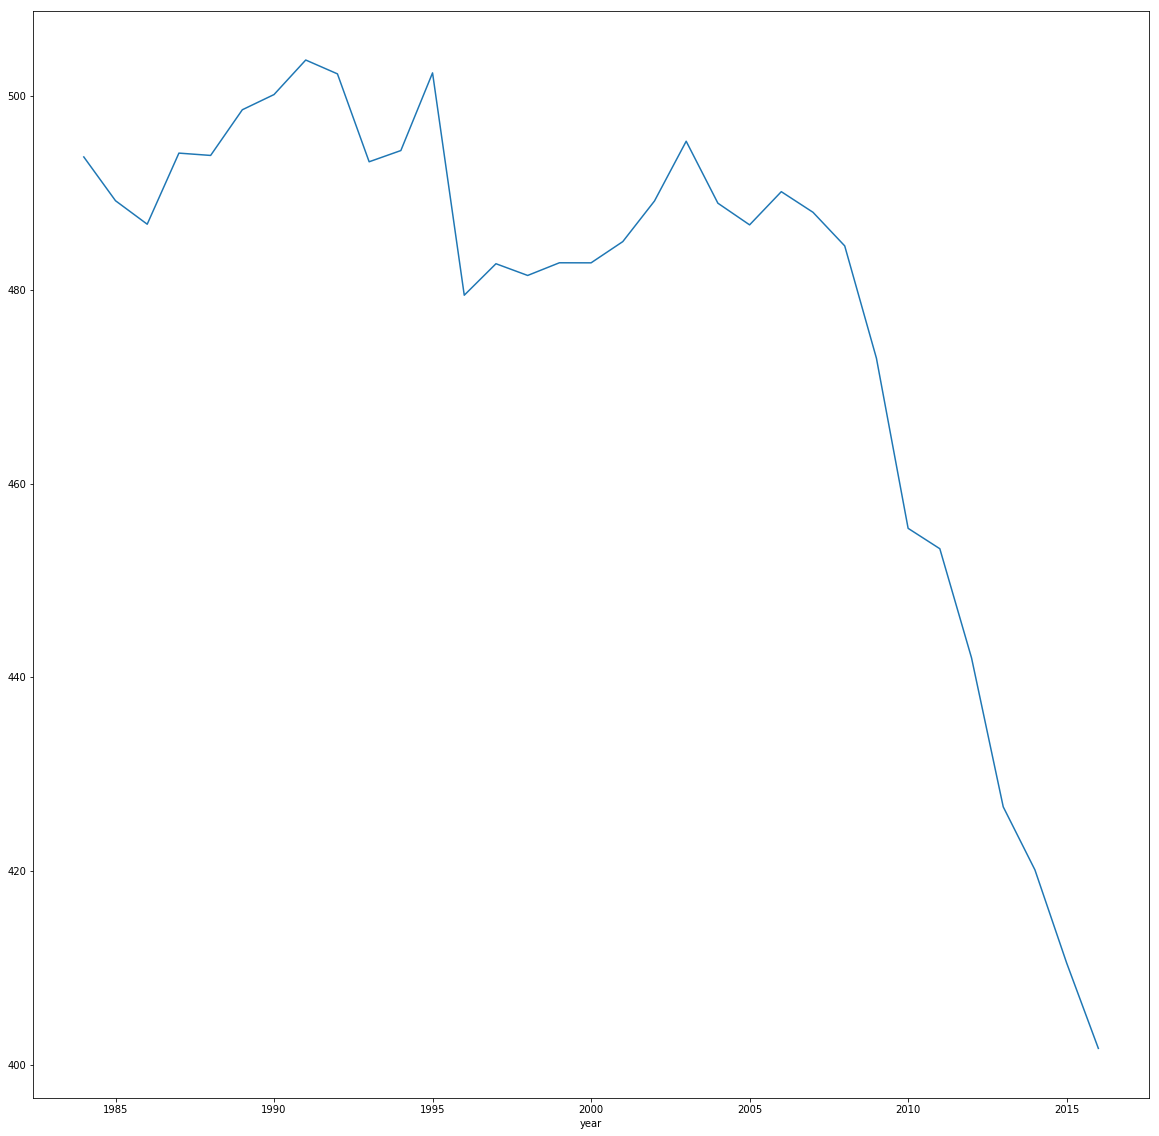

In [30]:
vehiculos_pre_2017.groupby("year")["co2"].mean().plot()

Veamos que en general la emision de co2 se ha reducido bastante con el tiempo

In [31]:
def evolucion_medias(col_calculo):
    vehiculos_pre_2017.groupby("year")[col_calculo].mean().plot()
    plt.show()

In [33]:
interact(evolucion_medias,col_calculo=columnas_numericas)

interactive(children=(Dropdown(description='col_calculo', options=('year', 'desplazamiento', 'cilindros', 'con…

<function __main__.evolucion_medias(col_calculo)>

Vemos que historicamente se ha ido aumentando la cilindrada(y el desplazamiento), en los vehiculos fabricados, pero a partir de 2010 esta rendencia se invierte , vemos que ambas variables estan lineal mente relacionadas.
Tambien vemos que el consumo y la emision de co2 ha ido bajando a lo largo de los años, y la tendencia se acentuo a parttir de  2006(¿Cambio climatico?, la emision de Una Verdad Incomoda)


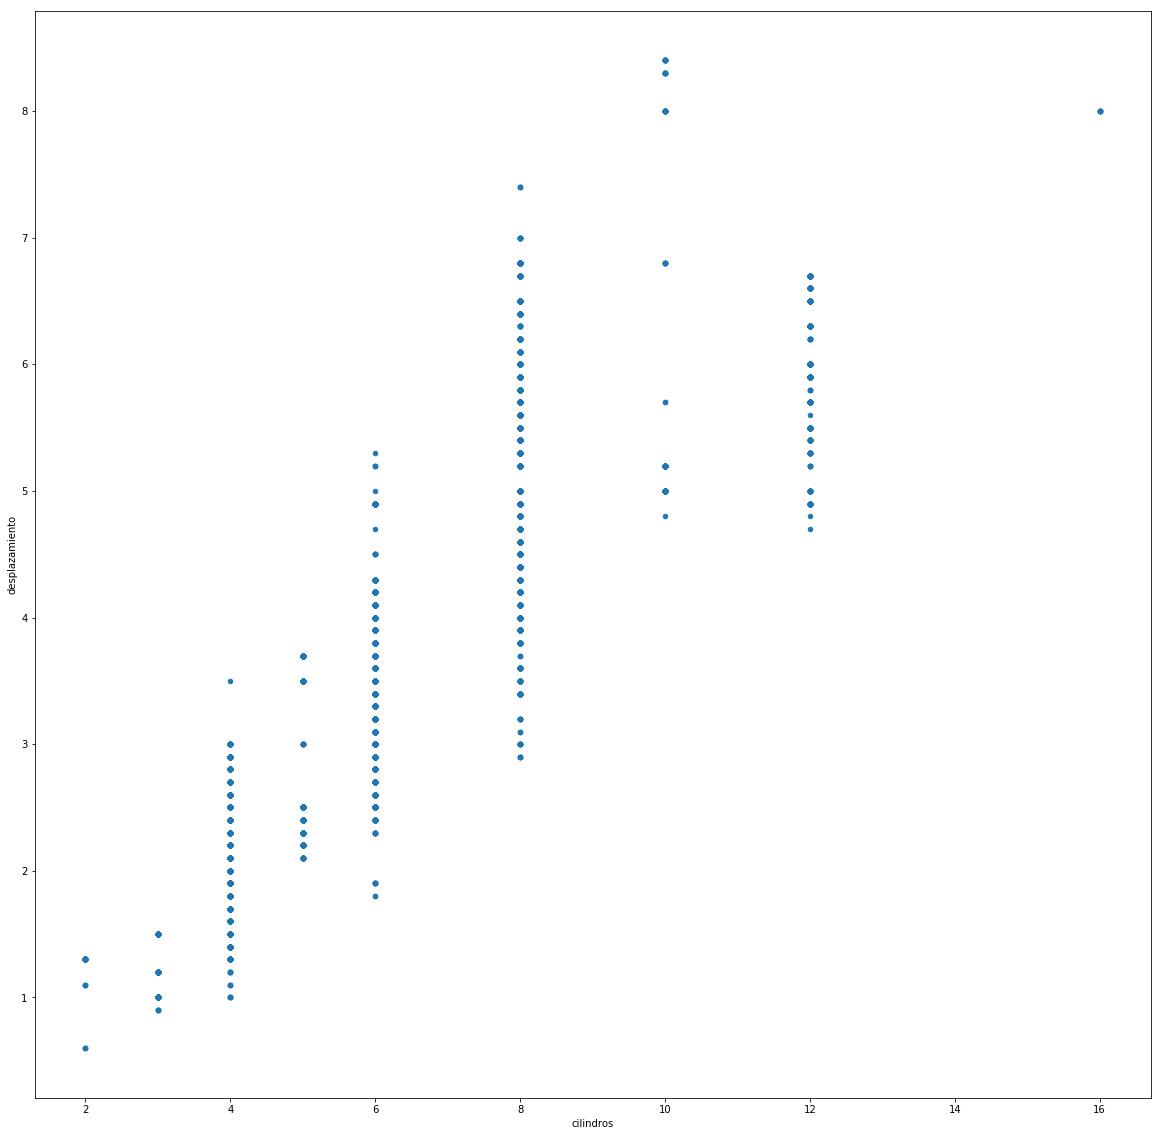

In [34]:
vehiculos.plot.scatter(x="cilindros",y="desplazamiento")

In [37]:
def evolucion_recuento(col_calculo):
    for categoria in vehiculos_pre_2017[col_calculo].unique():
        n_vehiculos_categoria_ano=vehiculos_pre_2017[vehiculos_pre_2017[col_calculo]==categoria].groupby(
        "year").apply(np.size)
        plt.plot(
            n_vehiculos_categoria_ano.index,
            n_vehiculos_categoria_ano,
            label=categoria
        )
        plt.legend()  

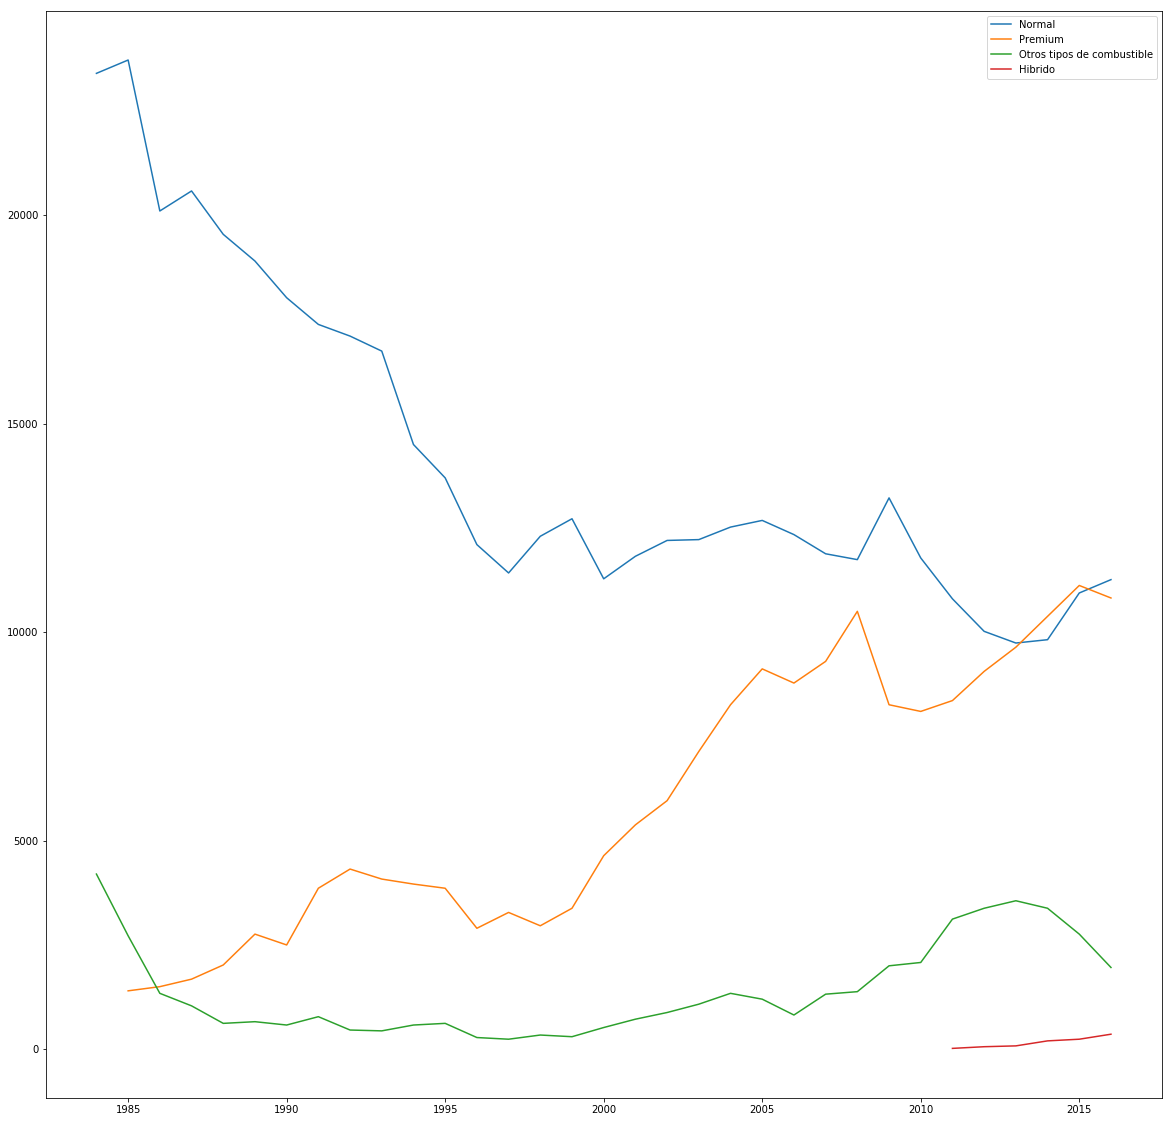

In [38]:
evolucion_recuento("combustible_tipo")

Una vez hemos terminado el análisis, el paso final es compilar toda la información obtenida en un documento. Dicho documento tiene dos objetivos principales:

- Informar a aquellas personas interesadas de los descubrimientos encontrados. ¿Esto nos incluye a nosotros mismos en el futuro!
- Facilitar la replicación del análisis por otros Data Scientists.


# Conclusiones del análisis


#### Descripción

El dataset consiste en información relativa a vehículos vendidos en USA desde 1985. Dicha información incluye detalles técnicos (cilindrada, tipo de transmisión) y detalles medioambientales (consumo de gasolina, emisiones de CO2)

El archivo original está en: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip
El archivo que vamos a usar es una versión modificada (con menos columnas)

Descripcion del dataset Original
http://www.fueleconomy.gov/feg/ws/index.shtml#ft7

Las entidades de las que consta dicho dataset son:

* fabricante
* fabricante-modelo
* fabricante-model-año
* fabricante-año

Las variables que existen en dicho dataset son:

```
fabricante         categorica
modelo             categorica
year               ordinal/numérica
desplazamiento     numérica
cilindros          numérica
transmision        categorica
traccion           categorica
clase              categorica
combustible        categorica
consumo            numérica
co2                numérica
```

#### QA

- Las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
- hay un outlier en las variables `co2` y `consumo`
- Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).
- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

#### Distribución de variables

- Ninguna variable numérica sigue una distribución normal

- la variable numérica `cilindros` tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro)

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)

- 65% de los vehiculos usan gasolina normal

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango

- 70% de los vehiculos usan traccion a las dos ruedas

- dos tercios de los coches tienen transmision automática

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total)

- Existen relaciones lineales entre cilindros/desplazamiento y co2/consumo_litros_milla

#### Comparaciones

- Hay mas vehiculos de dos ruedas de bajo consumo que de traccion a las 4 ruedas
- Los fabricantes se concentran mas en vehiculos de motor pequeño/bajo consumo y motor muy grande/alto consumo
- La mayor parte de coches tienen transmision automatica, con los coches pequeños teniendo valores similares de coches automaticos y manuales
- Hay una cantidad de camionetas que son mas contaminantes que cualquier otro tipo de coche
- Vehiculos con transmision automatica tienen valores de co2 y consumo ligeramente más altos
- Furgonetas y camionetas tienen el consumo más alto (alrededor de 0.25 litros/milla). Por otra parte, los coches familiares y pequeños tienen el menor consumo de gasolina (~0.15 litros/milla)
- los valores de co2 son similares  independientemente del tipo de gasolina empleado
- Camionentas de gasolina Premium consumen un 38% más que vehiculos pequeños que usan el mismo tipo de gasolina
- El consumo y emisión de co2 han ido bajando de forma continuada desde 1985
- Históricamente se ha ido aumentando la cilindrada en los vehiculos fabricados, pero a partir de 2010 esta tendencia se invierte